In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
file_path=r"C:\Users\jayen\Regression_seoul\data\SeoulBikeData.csv"
df=pd.read_csv(file_path,encoding='latin-1')

In [5]:
#SHAPE OF MY DATA
df.shape

(8760, 14)

In [6]:
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
919,08/01/2018,374,7,0.7,44,0.8,1357,-10.1,0.00,0.0,0.0,Winter,No Holiday,Yes
6499,28/08/2018,84,19,23.9,98,0.8,1792,23.5,0.00,7.0,0.0,Summer,No Holiday,Yes
6838,11/09/2018,1868,22,21.6,52,1.9,2000,11.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
2425,12/03/2018,163,1,2.9,51,0.8,1119,-6.2,0.00,0.0,0.0,Spring,No Holiday,Yes
6203,16/08/2018,672,11,33.5,48,2.4,1968,20.9,2.71,0.0,0.0,Summer,No Holiday,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


NOW DOING SOME EDA AND CLEANNG PROCESS AND FEATURE ENGGNERING


In [12]:
#CHANGING THE DATE COLUMN TO DATE DATA TYPE
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [13]:
#EXTRACTING YEAR, MONTHS AND DAY COLUMN FROM DATE COLUMNS
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Months_name']=df['Date'].dt.month_name()
df['Months']=df['Date'].dt.month
# Extract the weekday and create a new column
df['Weekday'] = df['Date'].dt.day_name()

#NOW DROPING THE DATE COLUMN
df.drop(columns='Date',inplace=True)

In [14]:
                     #NOW CHECKING THE NULL VALUES


df.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Day                          0
Months_name                  0
Months                       0
Weekday                      0
dtype: int64

In [15]:
                      #NOW CHECKING THE DUPLICATES VALUE
df.duplicated().sum()

0

CHECKING THE NUMBER OF UNIQUE VALUE FOR EACH COLUMN

In [20]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Year                            2
Day                            31
Months_name                    12
Months                         12
Weekday                         7
dtype: int64

In [21]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))




We have 13 numerical features : ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year', 'Day', 'Months']

We have 5 categorical features : ['Seasons', 'Holiday', 'Functioning Day', 'Months_name', 'Weekday']


NOW ILL PERFORM SOME EDA 

In [23]:
#THIS IS DAY WISE COUNT OF EVERY MONTH HOW MUCH BIKE NEED IN DAYS OF EVERY MONTH
t=df.pivot_table(values='Rented Bike Count',index='Day',columns='Months')
t

Months,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
1,178.750000,224.041667,213.833333,724.500000,1117.500000,1330.333333,134.625000,863.000000,1083.750000,1162.875000,956.833333,397.458333
2,268.583333,248.083333,351.375000,899.375000,310.333333,1278.875000,218.333333,862.208333,1120.041667,0.000000,1003.208333,355.125000
3,271.333333,137.083333,507.958333,875.625000,876.125000,1240.041667,1220.541667,866.416667,450.083333,1264.541667,0.000000,300.916667
4,268.875000,103.625000,195.333333,833.125000,1111.250000,1385.708333,1324.208333,765.125000,1230.375000,0.000000,852.958333,363.708333
5,290.291667,163.833333,358.208333,108.166667,1056.375000,1392.666667,1174.250000,725.625000,1296.416667,188.416667,978.000000,346.125000
6,215.833333,166.166667,500.125000,480.000000,606.500000,1270.750000,1403.166667,798.791667,1159.916667,668.208333,0.000000,277.875000
7,196.416667,195.708333,465.416667,464.958333,1172.500000,1333.416667,1294.833333,991.916667,1265.875000,1150.583333,688.541667,356.208333
8,237.958333,233.875000,321.291667,277.750000,1101.208333,1462.625000,1253.333333,995.000000,1242.208333,1223.416667,71.708333,334.666667
9,229.166667,261.166667,485.083333,795.083333,1203.958333,1079.625000,257.958333,901.833333,1181.416667,0.000000,0.000000,301.375000


<Axes: xlabel='Year', ylabel='Rented Bike Count'>

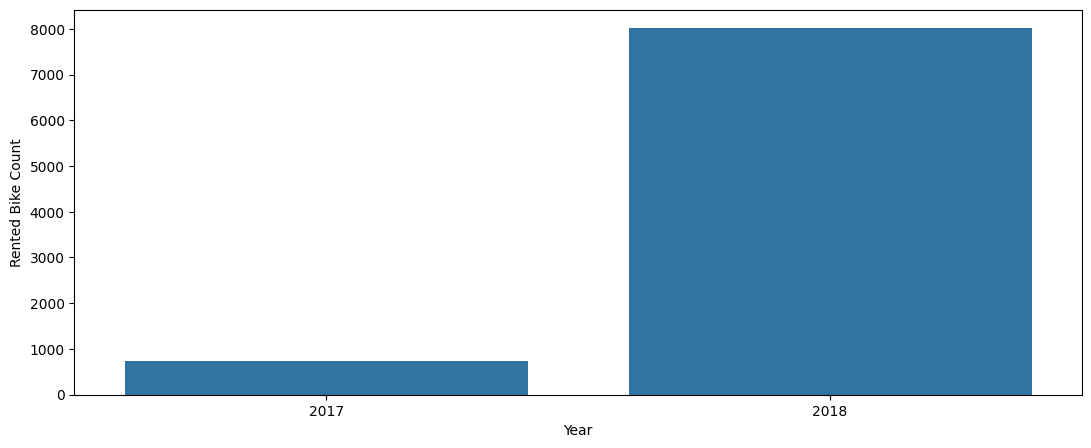

In [27]:
plt.figure(figsize=(13,5))
b=df.groupby('Year')['Rented Bike Count'].count().reset_index()
sb.barplot(data=b,x='Year',y='Rented Bike Count')

<Axes: xlabel='Months', ylabel='Rented Bike Count'>

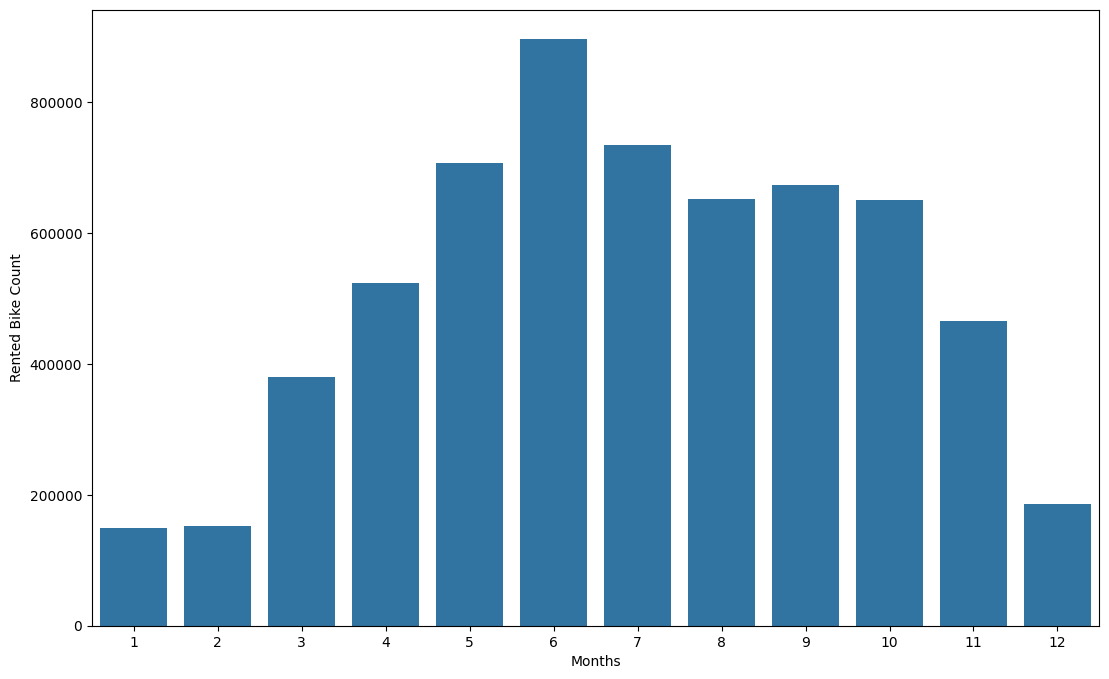

In [25]:
plt.figure(figsize=(13,8))
a=df.groupby('Months')['Rented Bike Count'].sum().reset_index()
sb.barplot(data=a,x='Months',y='Rented Bike Count')

#HERE U CAN SEE THE MONTHS 5 ,6, AND 7 ARE THE MOST HIGH IN COUNT MOST PEOPLE RENTED BIKE FROM SEOUL ON THOSE MONTHS.
#THE BEST TIME TO PURCHASE NEW BIKES IS FROM MAY TO OCTOBER CUZ DEMAND IS HIGH.

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

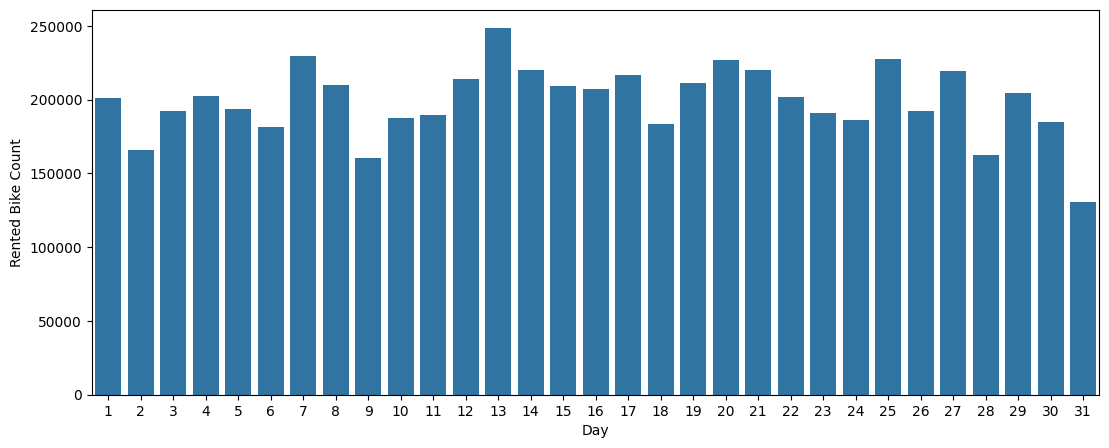

In [31]:
plt.figure(figsize=(13,5))
c=df.groupby('Day')['Rented Bike Count'].sum().reset_index()
sb.barplot(data=c,x='Day',y='Rented Bike Count')

#HERE U CAN SEE FROM DAY 4 TO 10 RENTING IS VERY HIGH U HAVE TO MAKE BIKES AVAILABLE IN THOSE DAY.
#U CAN SERVICE  ALL OF UR BIKE FROM STARTING OF MONTHS U CAN DO THAT ON 1,2,12 AND 31 ON THOSE DAY THE DEMAND IS LESS.

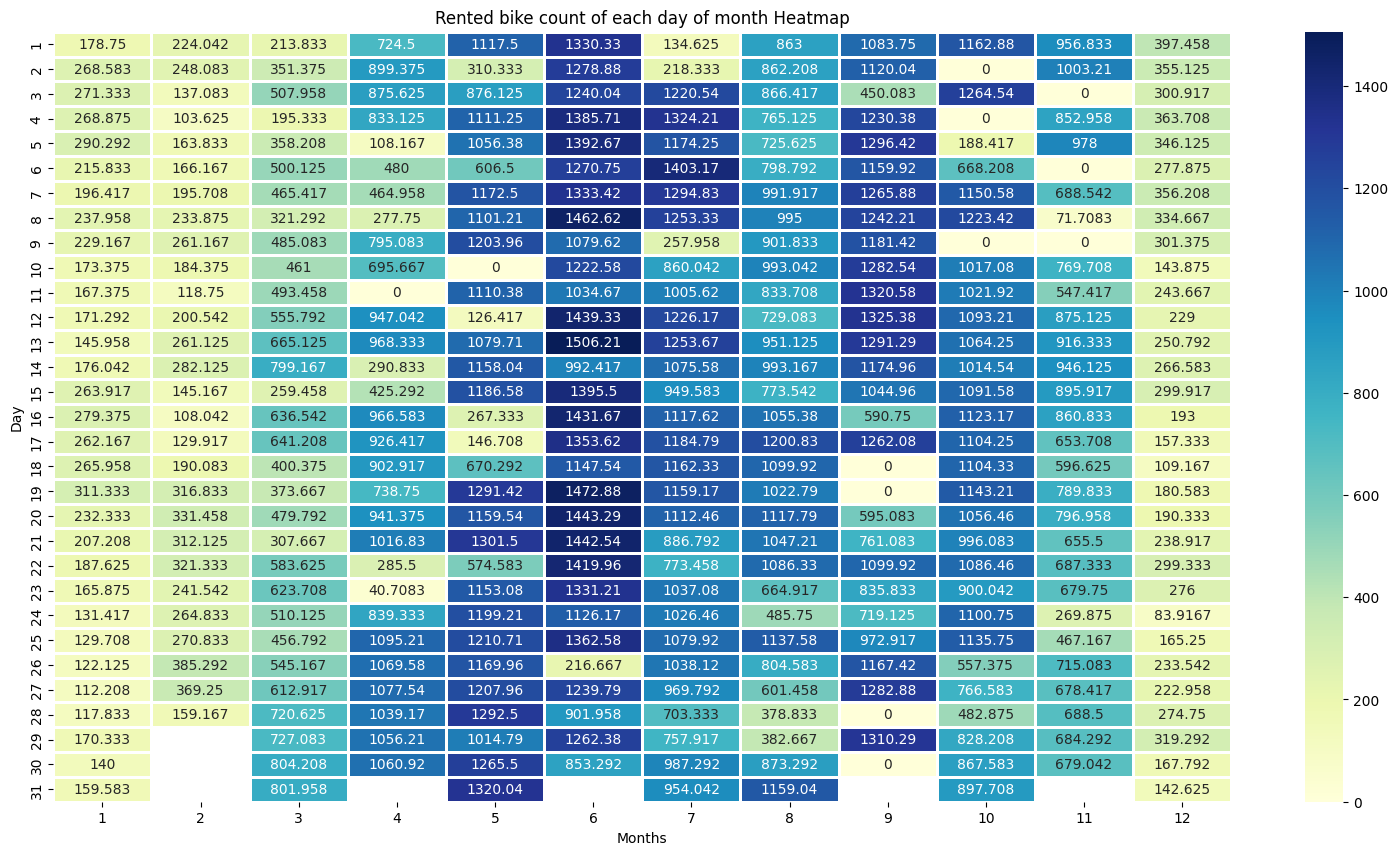

In [32]:
plt.figure(figsize=(19,10))
sb.heatmap(t, cmap='YlGnBu', annot=True, fmt='g', linewidths=1.0)#ANNOT USING CUZ WE WANT TO SEE THE VALUE ALSO AND USING FMT CUZ IT WILL SHOW THE ACTUAL VALUE
plt.title('Rented bike count of each day of month Heatmap')
plt.show()

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

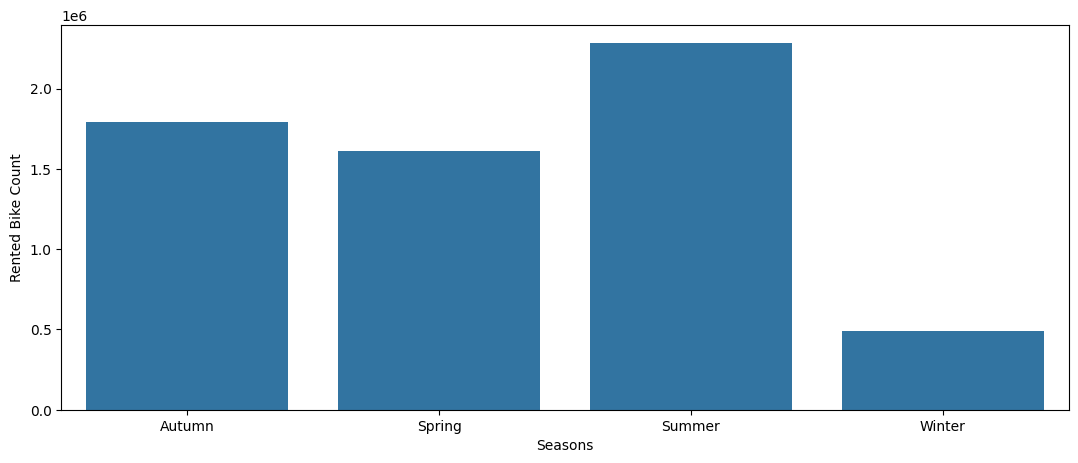

In [33]:
plt.figure(figsize=(13,5))
s=df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
sb.barplot(data=s,x='Seasons',y='Rented Bike Count')

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

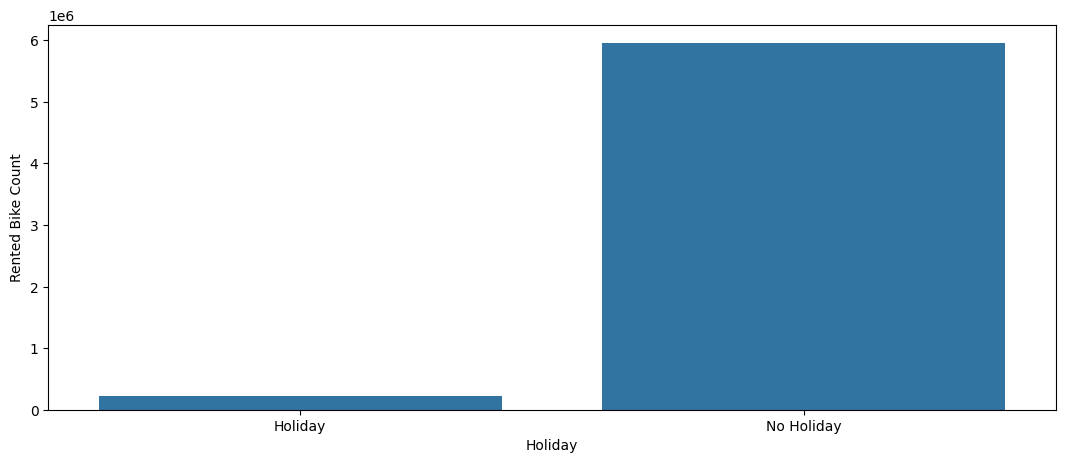

In [34]:
plt.figure(figsize=(13,5))
k=df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
sb.barplot(data=k,x='Holiday',y='Rented Bike Count')

#HERE U CAN SEE THE DEMANDING OF BIKES ARE SPECIALLY IS MORE ON NON HOLIDAYS

In [40]:
#HEATMAP
plt.figure(figsize=(13,5))
sb.heatmap(df.corr(),annot=True,cmap='coolwarm')

#IN THIS U HAVE TO UNDERSTAND WHICH COLUMN U HAVE TO KEEP WHICH NOT.
#IN THIS U CAN SEE TEMPREATURE AND DEW POINT IS HIGHLY CO RELATED SO WE KEEP THE ONLY ONE COLUMN ALWAYS CHECK THE IF THE ONE COLUMN HOW ITS CORELATED TO OTHER COLUMN SO IT
#HELPS US TOO KNOW WHICH COLUMN WE HAVE TO CHOOSE.
#KEY THING TO REMEBER AFTER FINDING THIS THEN CHECK BOTH COLUMN AND SEE HOW MUCH THEY CORELATED TO ITS MAIN OR TARGET COLUMN IF ONE WHO HAVE HIGH CORELANIRITY THEN DROP THE
#OTHER ONE

ValueError: could not convert string to float: 'Winter'

<Figure size 1300x500 with 0 Axes>

In [39]:
#IMPORTANT
df.corr()['Rented Bike Count']#WE CAN ALSO USE THIS TO KNOWN THE CORREALTION BETWEEN FEATURES BEST WAY TO UNDERSTAND.

ValueError: could not convert string to float: 'Winter'